In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import mglearn
import warnings

warnings.filterwarnings('ignore') 
plt.style.use('classic')

In [8]:
# 일반적인 모델
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC().fit(X_train_scaled, y_train)

print(f"test score: {svm.score(X_test_scaled, y_test):0.3f}")

test score: 0.972


In [9]:
# 일반적인 더 좋은 매개변수 찾기
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print(f"최상의 교차 검증 정확도 : {grid.best_score_:0.3f}")
print(f"테스트 점수 : {grid.score(X_test_scaled, y_test):0.3f}")
print("최적의 매개변수 : ", grid.best_params_)

최상의 교차 검증 정확도 : 0.981
테스트 점수 : 0.972
최적의 매개변수 :  {'C': 1, 'gamma': 1}


## 교차 검증을 사용할 경우 발생할 수 있는 오류
### train, test 셋을 구분하고 scaler는 train 셋에만 종속되어 있어 test 셋을 독립적인 환경에서 평가할 수 있었다.
### 하지만 교차 검증을 하면서 train, test 셋이 다시 섞이게 되고 그 결과 test셋은 독립적인 환경에서 평가할 수 없게 된다.

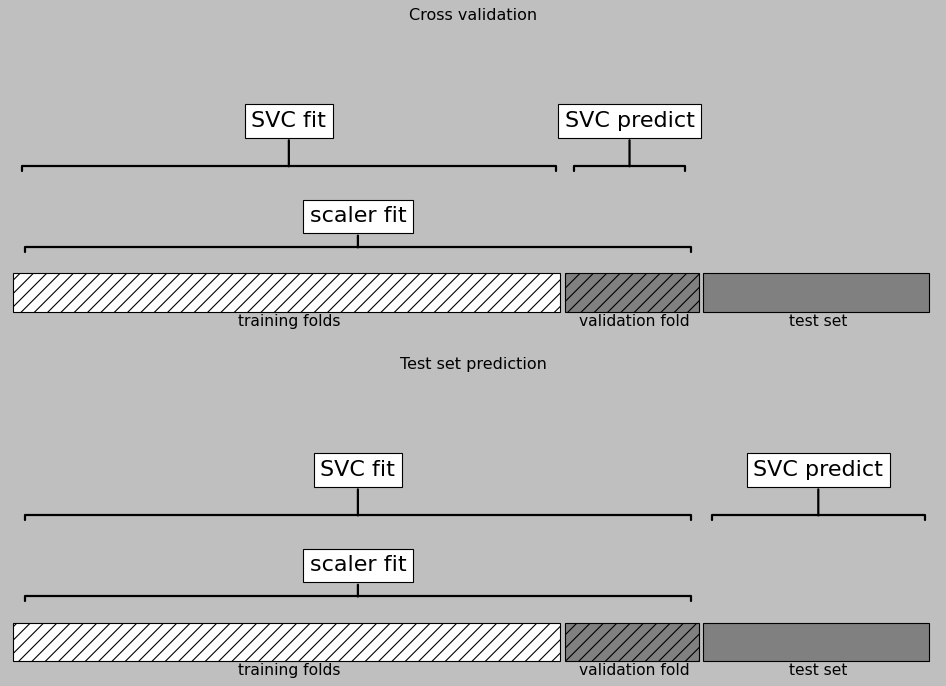

In [10]:
mglearn.plots.plot_improper_processing()

## 해결법
### 이를 해결하기 위해서는 scaler에서 fit 하는 과정이 교차검증의 모든 과정에 각각 포함되어야 한다.
### sklearn 에서는 이를 pipeline을 통해 구현할 수 있다.

In [12]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
pipe.fit(X_train, y_train)

print(f"test score : {pipe.score(X_test, y_test):0.3f}")

test score : 0.972


# 그리드 서치에 파이프 라인 적용하기